In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!apt-get install openjdk-17-jdk -y


In [ ]:
!apt-get install -y samtools

In [ ]:
import pandas as pd

# Load depth files
normal_depth = pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/norm_depth.txt", sep="\t", header=None, names=["chrom", "pos", "depth"])
tumor_depth = pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/tumor_depth.txt", sep="\t", header=None, names=["chrom", "pos", "depth"])
# Further analysis and visualization (e.g., histograms, scatter plots)

<ipython-input-4-50c578b07ae4>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_depth = pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/norm_depth.txt", sep="\t", header=None, names=["chrom", "pos", "depth"])


In [ ]:
# Merge dataframes on chromosome and position
merged_depth = pd.merge(normal_depth, tumor_depth, on=["chrom", "pos"], suffixes=("_normal", "_tumor"))



In [ ]:
# Filter based on minimum read depth (example: 10 reads)
merged_depth = merged_depth[(merged_depth["depth_normal"] >= 10) & (merged_depth["depth_tumor"] >= 10)]



In [ ]:
# Calculate read depth difference
merged_depth["depth_diff"] = merged_depth["depth_tumor"] - merged_depth["depth_normal"]

# Save filtered data
merged_depth.to_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_depth.txt", sep="\t", index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_depth.txt", sep="\t")
df

,chrom,pos,depth_normal,depth_tumor,depth_diff
0,5,1295071,866,440,-426
1,5,1295072,876,440,-436
2,5,1295073,878,443,-435
3,5,1295074,878,443,-435
4,5,1295075,878,443,-435
...,...,...,...,...,...
9162,KI270721.1,26586,280,634,354
9163,KI270721.1,26587,109,292,183
9164,KI270721.1,26588,103,289,186
9165,KI270721.1,26589,103,288,185


In [ ]:
# Split "chrompos" into chromosome and position (if necessary)
#df[["chrom", "pos"]] = df["chrompos"].str.split(":", expand=True)

# Calculate summary statistics
print(df[["depth_normal", "depth_tumor", "depth_diff"]].describe())


        depth_normal    depth_tumor    depth_diff
count    9167.000000    9167.000000   9167.000000
mean    18265.591142   16768.122286  -1497.468856
std     49223.144603   46066.513490   4378.247898
min        10.000000      10.000000 -25729.000000
25%        88.000000     100.000000   -896.000000
50%      1632.000000    1406.000000    -22.000000
75%     13231.500000   14325.000000     36.000000
max    293440.000000  285352.000000   1677.000000


<ipython-input-15-b65a87fa103f>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_depth = pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/norm_depth.txt", sep="\t", header=None, names=["chrom", "pos", "depth"])


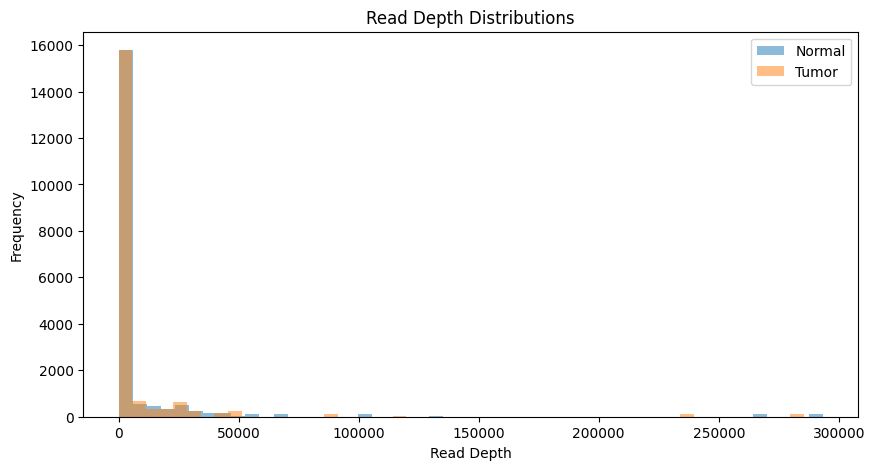

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load depth files
normal_depth = pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/norm_depth.txt", sep="\t", header=None, names=["chrom", "pos", "depth"])
tumor_depth =  pd.read_csv("/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/tumor_depth.txt", sep="\t", header=None, names=["chrom", "pos", "depth"])

# Merge dataframes on chromosome and position
merged_depth = pd.merge(normal_depth, tumor_depth, on=["chrom", "pos"], suffixes=("_normal", "_tumor"))

# 1. Histograms of Read Depth Distributions
plt.figure(figsize=(10, 5))
plt.hist(merged_depth["depth_normal"], bins=50, alpha=0.5, label="Normal")
plt.hist(merged_depth["depth_tumor"], bins=50, alpha=0.5, label="Tumor")
plt.xlabel("Read Depth")
plt.ylabel("Frequency")
plt.legend()
plt.title("Read Depth Distributions")
plt.show()



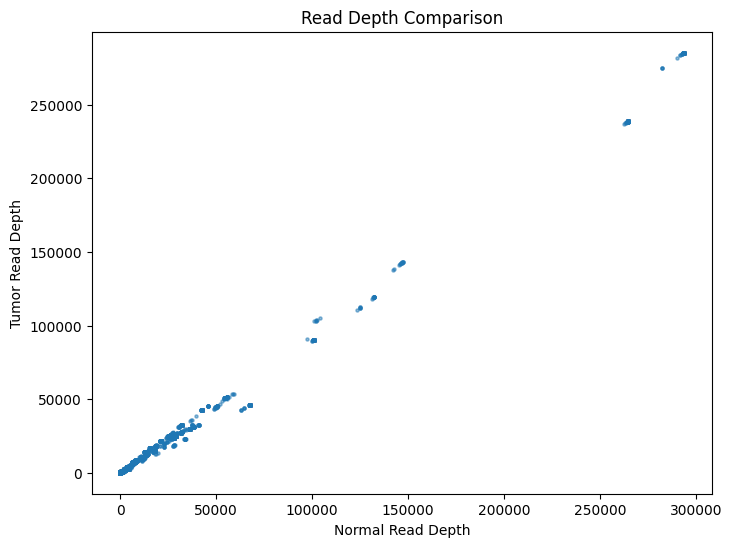

In [ ]:
# 2. Scatter Plot of Read Depths (Normal vs. Tumor)
plt.figure(figsize=(8, 6))
plt.scatter(merged_depth["depth_normal"], merged_depth["depth_tumor"], s=5, alpha=0.5)
plt.xlabel("Normal Read Depth")
plt.ylabel("Tumor Read Depth")
plt.title("Read Depth Comparison")
plt.show()



<ipython-input-17-4ba38fb183db>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([merged_depth["depth_normal"], merged_depth["depth_tumor"]], labels=["Normal", "Tumor"])


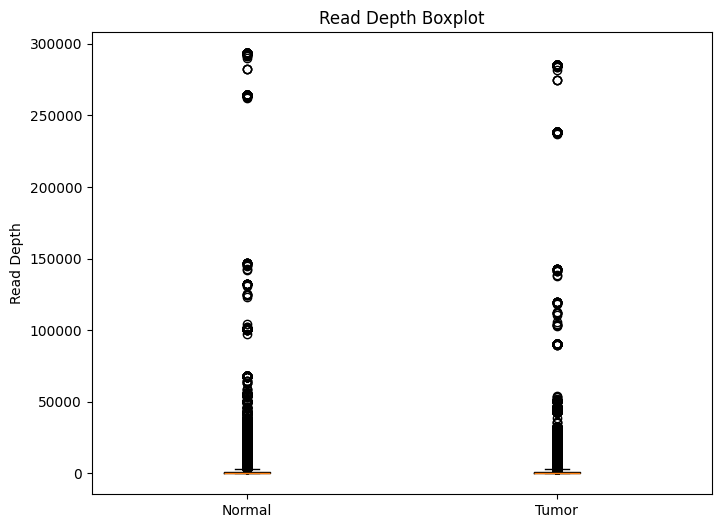

In [ ]:
# 3. Boxplot of Read Depths
plt.figure(figsize=(8, 6))
plt.boxplot([merged_depth["depth_normal"], merged_depth["depth_tumor"]], labels=["Normal", "Tumor"])
plt.ylabel("Read Depth")
plt.title("Read Depth Boxplot")
plt.show()



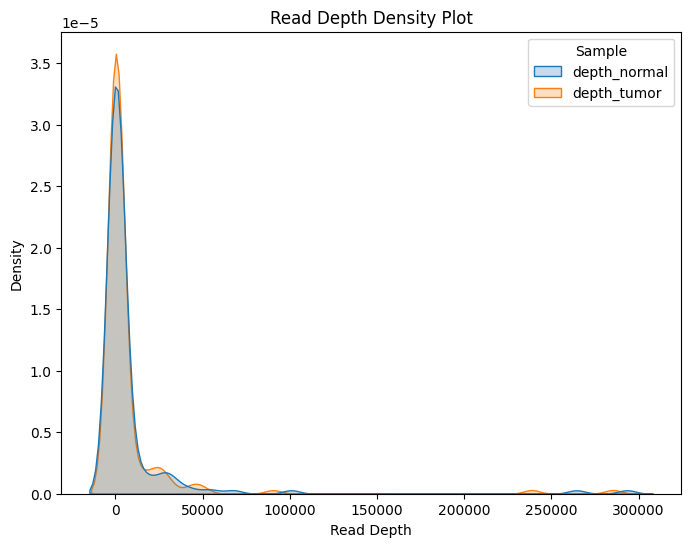

In [ ]:
import seaborn as sns

#
# Merge dataframes on chromosome and position
merged_depth = pd.merge(normal_depth, tumor_depth, on=["chrom", "pos"], suffixes=("_normal", "_tumor"))

# Create a new DataFrame for easier plotting
plot_df = pd.melt(merged_depth, id_vars=["chrom", "pos"],
                  value_vars=["depth_normal", "depth_tumor"],
                  var_name="Sample", value_name="Read_Depth")

# Create the density plot using seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=plot_df, x="Read_Depth", hue="Sample", fill=True)
plt.xlabel("Read Depth")
plt.ylabel("Density")
plt.title("Read Depth Density Plot")
plt.show()

In [ ]:
! samtools view -H /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/norm_aligned_sorted.bam


@HD	VN:1.0	SO:coordinate
@SQ	SN:1	LN:248956422
@SQ	SN:10	LN:133797422
@SQ	SN:11	LN:135086622
@SQ	SN:12	LN:133275309
@SQ	SN:13	LN:114364328
@SQ	SN:14	LN:107043718
@SQ	SN:15	LN:101991189
@SQ	SN:16	LN:90338345
@SQ	SN:17	LN:83257441
@SQ	SN:18	LN:80373285
@SQ	SN:19	LN:58617616
@SQ	SN:2	LN:242193529
@SQ	SN:20	LN:64444167
@SQ	SN:21	LN:46709983
@SQ	SN:22	LN:50818468
@SQ	SN:3	LN:198295559
@SQ	SN:4	LN:190214555
@SQ	SN:5	LN:181538259
@SQ	SN:6	LN:170805979
@SQ	SN:7	LN:159345973
@SQ	SN:8	LN:145138636
@SQ	SN:9	LN:138394717
@SQ	SN:MT	LN:16569
@SQ	SN:X	LN:156040895
@SQ	SN:Y	LN:57227415
@SQ	SN:KI270728.1	LN:1872759
@SQ	SN:KI270727.1	LN:448248
@SQ	SN:KI270442.1	LN:392061
@SQ	SN:KI270729.1	LN:280839
@SQ	SN:GL000225.1	LN:211173
@SQ	SN:KI270743.1	LN:210658
@SQ	SN:GL000008.2	LN:209709
@SQ	SN:GL000009.2	LN:201709
@SQ	SN:KI270747.1	LN:198735
@SQ	SN:KI270722.1	LN:194050
@SQ	SN:GL000194.1	LN:191469
@SQ	SN:KI270742.1	LN:186739
@SQ	SN:GL000205.2	LN:185591
@SQ	SN:GL000195.1	LN:182896
@SQ	SN:KI270736.1	LN:181920
@S

In [ ]:
! samtools view -H /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/tumor_aligned_sorted.bam


In [ ]:
import pandas as pd

# Load the CSV file
panel_file = '/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/PANCAN_PDAC_100plex_ref.csv'
panel_data = pd.read_csv(panel_file)
panel_data

,ID,Sequence,Len,Gene,Chr,Absolute Start,Absolute End
0,KRAS_chr12:25245311-25245380,CTCTATTGTTGGATCATATTCGTCCACAAAATGATTCTGAATTAGC...,141,KRAS,chr12,25245274,25245415
1,TP53_chr17:7674188-7674257,GTGGCAAGTGGCTCCTGACCTGGAGTCTTCCAGTGTGATGATGGTG...,124,TP53,chr17,7674162,7674286
2,TP53_chr17:7673761-7673830,GCTCCCCTTTCTTGCGGAGATTCTCTTCCTCTGTGCGCCGGTCTCT...,130,TP53,chr17,7673737,7673867
3,TP53_chr17:7675074-7675143,TGCTCACCATCGCTATCTGAGCAGCGCTCATGGTGGGGGCAGCGCC...,140,TP53,chr17,7675046,7675186
4,TP53_chr17:7674885-7674954,TGCAAACCAGACCTCAGGCGGCTCATAGGGCACCACCACACTATGT...,138,TP53,chr17,7674847,7674985
...,...,...,...,...,...,...,...
95,STK11_chr19:1220577-1220645,CGCCCCCTCCCGGGCACTCCCTGAGGGCTGCACGGCACCGCCACAG...,148,STK11,chr19,1220535,1220683
96,FLCN_chr17:17216380-17216447,GGCCCCACAGCCCGCGGGGGCACGCACCTGAGGAGAGCACGTGGGG...,128,FLCN,chr17,17216353,17216481
97,PIK3CA_chr3:179210251-179210318,CTTGTTTGATTACACAGACACTCTAGTATCTGGAAAAATGGCTTTG...,142,PIK3CA,chr3,179210218,179210360
98,FBXW7_chr4:152326212-152326240,CTGTCTCAATATCCCAAACCCTAAGAGTGGCATCTCGAGAACCGCT...,104,FBXW7,chr4,152326179,152326283


In [ ]:


# Rename the 'Chr' column to 'Chrom'
panel_data.rename(columns={'Chr': 'chrom'}, inplace=True)

# Remove 'chr' from the values in the 'Chrom' column
panel_data['chrom'] = panel_data['chrom'].str.replace('chr', '', regex=False)

# Save the modified DataFrame back to a CSV file
panel_data.to_csv('/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/PANCAN_PDAC_100plex_ref.csv', index=False)

# Show the modified DataFrame
panel_data.head()


,ID,Sequence,Len,Gene,chrom,Absolute Start,Absolute End
0,KRAS_chr12:25245311-25245380,CTCTATTGTTGGATCATATTCGTCCACAAAATGATTCTGAATTAGC...,141,KRAS,12,25245274,25245415
1,TP53_chr17:7674188-7674257,GTGGCAAGTGGCTCCTGACCTGGAGTCTTCCAGTGTGATGATGGTG...,124,TP53,17,7674162,7674286
2,TP53_chr17:7673761-7673830,GCTCCCCTTTCTTGCGGAGATTCTCTTCCTCTGTGCGCCGGTCTCT...,130,TP53,17,7673737,7673867
3,TP53_chr17:7675074-7675143,TGCTCACCATCGCTATCTGAGCAGCGCTCATGGTGGGGGCAGCGCC...,140,TP53,17,7675046,7675186
4,TP53_chr17:7674885-7674954,TGCAAACCAGACCTCAGGCGGCTCATAGGGCACCACCACACTATGT...,138,TP53,17,7674847,7674985


In [ ]:
# Select relevant columns: chromosome, start position, and end position
panel_bed = panel_data[['chrom', 'Absolute Start', 'Absolute End']]

# Save to BED format (tab-delimited, no headers)
panel_bed_file = '/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/bed_format/targeted_panel.bed'
panel_bed.to_csv(panel_bed_file, sep='\t', header=False, index=False)


In [ ]:
!apt-get update -y
!apt-get install -y bedtools


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,199 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,588 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,227 kB]
Get:13 http://archive.ubuntu.com/u

In [ ]:
! bedtools intersect -a /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf \
                    -b /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/bed_format/targeted_panel.bed \
                    -header > /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/bed_format/filtered_mutations_panel.vcf


In [ ]:
!apt-get install -y vcftools

In [ ]:
!vcf-validator /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf


In [ ]:
!head -n 20 /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf

In [ ]:
!grep -v '^##' /content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf


#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	Normal	Tumor
10	97140787	.	T	C	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=9,54|1,4;DP=68;ECNT=1;GERMQ=93;MBQ=37,37;MFRL=216,195;MMQ=42,42;MPOS=23;NALOD=1.41;NLOD=7.52;POPAF=6;TLOD=13.33	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/0:26,0:0.037:26:10,0:15,0:25,0:4,22,0,0	0/1:37,5:0.137:42:24,4:12,1:37,5:5,32,1,4
15	73925444	.	G	A	.	map_qual	AS_FilterStatus=map_qual;AS_SB_TABLE=23,24|2,2;DP=51;ECNT=1;GERMQ=77;MBQ=20,20;MFRL=154,154;MMQ=24,23;MPOS=36;NALOD=1;NLOD=2.71;POPAF=6;TLOD=6.37	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/0:18,0:0.091:18:5,0:4,0:9,0:9,9,0,0	0/1:29,4:0.158:33:11,2:3,0:15,2:14,15,2,2
16	84848199	.	C	T	.	map_qual	AS_FilterStatus=map_qual;AS_SB_TABLE=33,32|2,2;DP=69;ECNT=1;GERMQ=93;MBQ=20,20;MFRL=169,169;MMQ=40,24;MPOS=66;NALOD=1.2;NLOD=4.52;POPAF=6;TLOD=6.29	GT:AD:AF:DP:F1R2:F2R1:FAD:SB	0/0:30,0:0.059:30:8,0:7,0:15,0:15,15,0,0	0/1:35,4:0.136:39:11,2:6,0:18,2:18,17,2,2
17	7675088	.	C	T	.	map_qual	AS_FilterStatus=map_qual;AS_SB_TABLE=78,77|5,2;DP=164;ECN

In [ ]:

# Load VCF file
vcf_file = '/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf'
vcf_data = pd.read_csv(vcf_file, comment='#', delimiter='\t')
vcf_data


,10,97140787,.,T,C,..1,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=9,54|1,4;DP=68;ECNT=1;GERMQ=93;MBQ=37,37;MFRL=216,195;MMQ=42,42;MPOS=23;NALOD=1.41;NLOD=7.52;POPAF=6;TLOD=13.33",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:26,0:0.037:26:10,0:15,0:25,0:4,22,0,0","0/1:37,5:0.137:42:24,4:12,1:37,5:5,32,1,4"
0,15,73925444,.,G,A,.,map_qual,"AS_FilterStatus=map_qual;AS_SB_TABLE=23,24|2,2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:18,0:0.091:18:5,0:4,0:9,0:9,9,0,0","0/1:29,4:0.158:33:11,2:3,0:15,2:14,15,2,2"
1,16,84848199,.,C,T,.,map_qual,"AS_FilterStatus=map_qual;AS_SB_TABLE=33,32|2,2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:30,0:0.059:30:8,0:7,0:15,0:15,15,0,0","0/1:35,4:0.136:39:11,2:6,0:18,2:18,17,2,2"
2,17,7675088,.,C,T,.,map_qual,"AS_FilterStatus=map_qual;AS_SB_TABLE=78,77|5,2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:86,0:0.012:86:40,0:41,0:82,0:52,34,0,0","0/1:69,7:0.093:76:41,3:26,3:67,6:26,43,5,2"
3,17,58370936,.,CG,C,.,map_qual;normal_artifact;strand_bias;weak_evid...,"AS_FilterStatus=weak_evidence,map_qual,strand_...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:88,7:0.083:95:21,2:66,4:87,7:58,30,0,7","0/1:81,6:0.07:87:18,4:62,1:81,6:52,29,0,6"
4,17,81192466,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=47,43|2,2;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:25,0:0.063:25:7,0:6,0:14,0:14,11,0,0","0/1:65,4:0.081:69:18,0:15,2:33,2:33,32,2,2"
5,19,1220627,.,G,A,.,map_qual,"AS_FilterStatus=map_qual;AS_SB_TABLE=45,30|2,2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:36,0:0.034:36:6,0:21,0:27,0:21,15,0,0","0/1:39,4:0.091:43:6,0:23,2:29,2:24,15,2,2"
6,19,15614428,.,GAAAAA,"G,GA,GAAAA,GAAAAAA",.,germline;multiallelic;normal_artifact,AS_FilterStatus=SITE|strand_bias|weak_evidence...,GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:21,9,14,3,3:0.154,0.276,0.075,0.066:50:4,4...","0/1/2/3/4:15,5,6,5,3:0.154,0.182,0.145,0.101:3..."
7,19,15614432,.,A,AAAG,.,map_qual;weak_evidence,"AS_FilterStatus=weak_evidence,map_qual;AS_SB_T...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:36,0:0.024:36:6,0:17,0:36,0:19,17,0,0","0/1:23,3:0.143:26:3,1:14,2:23,3:14,9,0,3"
8,3,176242700,.,CT,"C,CTT",.,germline;multiallelic;normal_artifact;slippage...,AS_FilterStatus=weak_evidence|weak_evidence;AS...,GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:2,8,1:0.662,0.099:11:2,4,0:0,4,1:2,8,1:0,2...","0/1/2:23,5,4:0.171,0.142:32:14,3,3:6,1,0:23,5,..."
9,4,152326206,.,T,TC,.,clustered_events;haplotype;normal_artifact;str...,"AS_FilterStatus=weak_evidence,strand_bias;AS_S...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:28,1:0.064:29:9,0:17,1:28,1:0|1:152326202_...","0|1:29,4:0.146:33:4,0:22,4:29,4:0|1:152326202_..."


In [ ]:
!pip install vcfpy


In [ ]:
import vcfpy
import pandas as pd
vcf_path= '/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf'
# Open the VCF file
vcf_reader = vcfpy.Reader.from_path(vcf_path)


In [ ]:


# Initialize lists to store the extracted data
chromosomes = []
positions = []
af_values_normal = []
dp_values_normal = []

# Extract relevant information
for record in vcf_reader:
    chromosomes.append(record.CHROM)
    positions.append(record.POS)

    # Get the INFO field where allele frequency is stored (e.g., AF tag)
    info = record.INFO
    af = info.get('AF', [])

    # Access sample calls using 'record.calls' instead of 'record.samples'
    for call in record.calls:
        # Check if the sample name is 'Normal' (or whatever your normal tissue is named)
        if 'Normal' in call.sample:  # Modify as needed
            dp = call.data['DP']  # Get the depth (DP) for the normal sample
            af_normal = af[0] if af else 0.0  # If AF exists, get the first AF value, otherwise 0.0

            af_values_normal.append(af_normal)
            dp_values_normal.append(dp)

# Create a DataFrame for analysis
df = pd.DataFrame({
    'Chromosome': chromosomes,
    'Position': positions,
    'AF_Normal': af_values_normal,
    'DP_Normal': dp_values_normal
})

# Show the DataFrame
df.head()


,Chromosome,Position,AF_Normal,DP_Normal
0,15,73925444,0.0,18
1,16,84848199,0.0,30
2,17,7675088,0.0,86
3,17,58370936,0.0,95
4,17,81192466,0.0,25


In [ ]:
# Calculate the median depth (DP) of normal sample as a measure for background mutation level
median_dp = df['DP_Normal'].median()

# If AF is 0.0 for normal samples, the background mutation level can be approximated by the median DP
print(f"Median Depth (DP) of Normal Samples: {median_dp}")

# Approximate RPM for each mutation (here we will assume the total reads to be the sum of DP values)
total_dp_normal = df['DP_Normal'].sum()
df['RPM'] = (df['DP_Normal'] / total_dp_normal) * 1_000_000  # Reads per million

# Show the DataFrame with RPM and background mutation level
print("\nData with RPM and Background Mutation Level:")
print(df[['Chromosome', 'Position', 'AF_Normal', 'DP_Normal', 'RPM']])

# Optional: Get some statistics about the background mutation level
background_mutation_level = df['DP_Normal'].mean()  # You can use mean, median, or a threshold
print(f"\nBackground Mutation Level (mean DP): {background_mutation_level}")


Median Depth (DP) of Normal Samples: 30.0

Data with RPM and Background Mutation Level:
   Chromosome   Position  AF_Normal  DP_Normal            RPM
0          15   73925444        0.0         18   36363.636364
1          16   84848199        0.0         30   60606.060606
2          17    7675088        0.0         86  173737.373737
3          17   58370936        0.0         95  191919.191919
4          17   81192466        0.0         25   50505.050505
5          19    1220627        0.0         36   72727.272727
6          19   15614428        0.0         50  101010.101010
7          19   15614432        0.0         36   72727.272727
8           3  176242700        0.0         11   22222.222222
9           4  152326206        0.0         29   58585.858586
10          4  152326209        0.0         28   56565.656566
11          5  112839742        0.0         12   24242.424242
12          7   74210269        0.0         39   78787.878788

Background Mutation Level (mean DP): 38.076

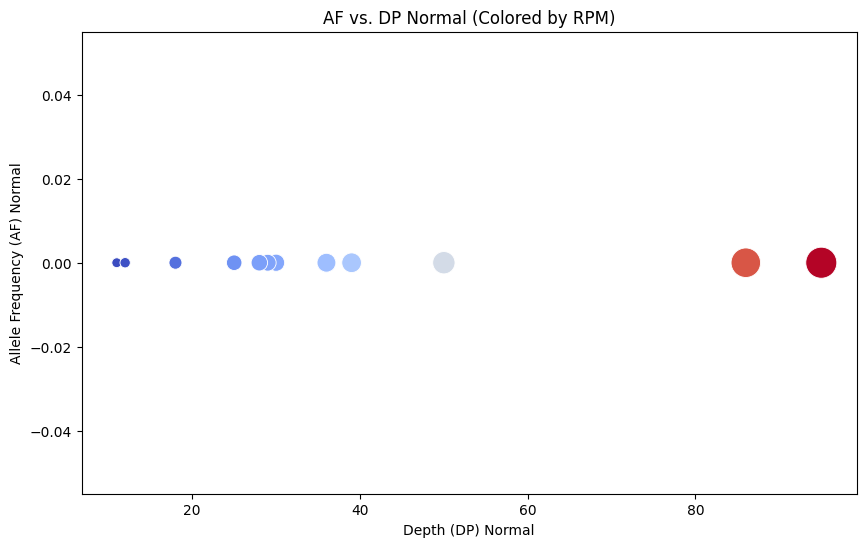

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
data = {
    'Chromosome': [15, 16, 17, 17, 17, 19, 19, 19, 3, 4, 4, 5, 7],
    'Position': [73925444, 84848199, 7675088, 58370936, 81192466, 1220627, 15614428, 15614432, 176242700, 152326206, 152326209, 112839742, 74210269],
    'AF_Normal': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'DP_Normal': [18, 30, 86, 95, 25, 36, 50, 36, 11, 29, 28, 12, 39],
    'RPM': [36363.636364, 60606.060606, 173737.373737, 191919.191919, 50505.050505, 72727.272727, 101010.101010, 72727.272727, 22222.222222, 58585.858586, 56565.656566, 24242.424242, 78787.878788]
}

df = pd.DataFrame(data)

# Create a scatter plot of AF vs. DP
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='DP_Normal', y='AF_Normal', hue='RPM', size='RPM', sizes=(50, 500), palette="coolwarm", legend=False)
plt.title("AF vs. DP Normal (Colored by RPM)")
plt.xlabel("Depth (DP) Normal")
plt.ylabel("Allele Frequency (AF) Normal")
plt.show()


In [ ]:
import pysam

# Open the VCF file
vcf = pysam.VariantFile('/content/drive/MyDrive/tumor_normal_ngs_pupil_bio/sam_bam_files/filtered_mutations.vcf', "r")

# Loop through each record in the VCF file
for record in vcf.fetch():
    # Extract AF and DP for the tumor sample
    tumor_sample = record.samples['Tumor']

    # Check if AF and DP are available for the tumor sample
    if 'AF' in tumor_sample and 'DP' in tumor_sample:
        af_tumor = tumor_sample['AF'][0]  # Allele frequency for tumor
        dp_tumor = tumor_sample['DP']  # Depth for tumor

        print(f"Chromosome: {record.chrom}, Position: {record.pos}, AF_Tumor: {af_tumor}, DP_Tumor: {dp_tumor}")


Chromosome: 10, Position: 97140787, AF_Tumor: 0.13699999451637268, DP_Tumor: 42
Chromosome: 15, Position: 73925444, AF_Tumor: 0.15800000727176666, DP_Tumor: 33
Chromosome: 16, Position: 84848199, AF_Tumor: 0.13600000739097595, DP_Tumor: 39
Chromosome: 17, Position: 7675088, AF_Tumor: 0.09300000220537186, DP_Tumor: 76
Chromosome: 17, Position: 58370936, AF_Tumor: 0.07000000029802322, DP_Tumor: 87
Chromosome: 17, Position: 81192466, AF_Tumor: 0.08100000023841858, DP_Tumor: 69
Chromosome: 19, Position: 1220627, AF_Tumor: 0.09099999815225601, DP_Tumor: 43
Chromosome: 19, Position: 15614428, AF_Tumor: 0.15399999916553497, DP_Tumor: 34
Chromosome: 19, Position: 15614432, AF_Tumor: 0.14300000667572021, DP_Tumor: 26
Chromosome: 3, Position: 176242700, AF_Tumor: 0.17100000381469727, DP_Tumor: 32
Chromosome: 4, Position: 152326206, AF_Tumor: 0.1459999978542328, DP_Tumor: 33
Chromosome: 4, Position: 152326209, AF_Tumor: 0.16599999368190765, DP_Tumor: 28
Chromosome: 5, Position: 112839742, AF_Tumo

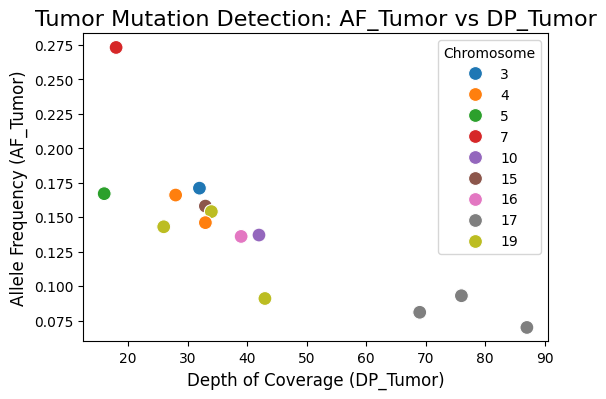

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data as a DataFrame
data = {
    'Chromosome': [10, 15, 16, 17, 17, 17, 19, 19, 19, 3, 4, 4, 5, 7],
    'Position': [97140787, 73925444, 84848199, 7675088, 58370936, 81192466, 1220627, 15614428, 15614432, 176242700, 152326206, 152326209, 112839742, 74210269],
    'AF_Tumor': [0.137, 0.158, 0.136, 0.093, 0.070, 0.081, 0.091, 0.154, 0.143, 0.171, 0.146, 0.166, 0.167, 0.273],
    'DP_Tumor': [42, 33, 39, 76, 87, 69, 43, 34, 26, 32, 33, 28, 16, 18]
}

df = pd.DataFrame(data)

# Plot: Scatter plot of AF_Tumor vs DP_Tumor
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='DP_Tumor', y='AF_Tumor', hue='Chromosome', palette='tab10', s=100)

# Title and labels
plt.title('Tumor Mutation Detection: AF_Tumor vs DP_Tumor', fontsize=16)
plt.xlabel('Depth of Coverage (DP_Tumor)', fontsize=12)
plt.ylabel('Allele Frequency (AF_Tumor)', fontsize=12)

# Show plot
plt.show()


In [ ]:
# Filter for mutations with AF_Tumor > 0.05 and DP_Tumor > 30
filtered_df = df[(df['AF_Tumor'] > 0.05) & (df['DP_Tumor'] > 30)]

print(filtered_df)


    Chromosome   Position  AF_Tumor  DP_Tumor
0           10   97140787     0.137        42
1           15   73925444     0.158        33
2           16   84848199     0.136        39
3           17    7675088     0.093        76
4           17   58370936     0.070        87
5           17   81192466     0.081        69
6           19    1220627     0.091        43
7           19   15614428     0.154        34
9            3  176242700     0.171        32
10           4  152326206     0.146        33


In [ ]:
import pandas as pd

# Example filtered DataFrame
data = {
    'Chromosome': [10, 15, 16, 17, 17, 17, 19, 19, 3, 4],
    'Position': [97140787, 73925444, 84848199, 7675088, 58370936, 81192466, 1220627, 15614428, 176242700, 152326206],
    'AF_Tumor': [0.137, 0.158, 0.136, 0.093, 0.070, 0.081, 0.091, 0.154, 0.171, 0.146],
    'DP_Tumor': [42, 33, 39, 76, 87, 69, 43, 34, 32, 33]
}

df = pd.DataFrame(data)

# Calculate VAF (which is equivalent to AF_Tumor)
df['VAF_Tumor'] = df['AF_Tumor']

# Print the updated DataFrame with VAF
print(df)


   Chromosome   Position  AF_Tumor  DP_Tumor  VAF_Tumor
0          10   97140787     0.137        42      0.137
1          15   73925444     0.158        33      0.158
2          16   84848199     0.136        39      0.136
3          17    7675088     0.093        76      0.093
4          17   58370936     0.070        87      0.070
5          17   81192466     0.081        69      0.081
6          19    1220627     0.091        43      0.091
7          19   15614428     0.154        34      0.154
8           3  176242700     0.171        32      0.171
9           4  152326206     0.146        33      0.146


<ipython-input-42-65d99f155e1c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chromosome', y='VAF_Tumor', data=df, palette='viridis')


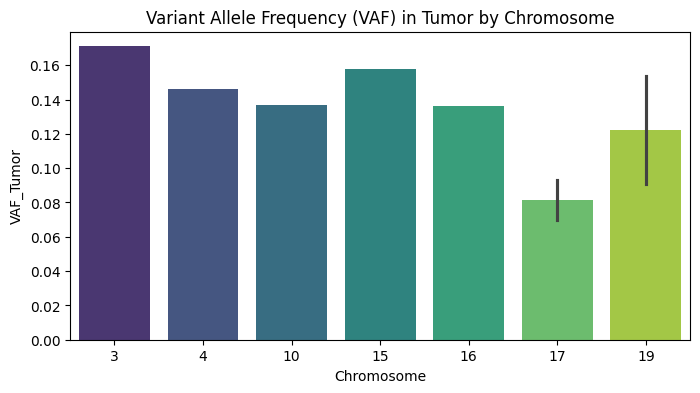

In [ ]:
import seaborn as sns

# Bar plot of VAF_Tumor grouped by Chromosome
plt.figure(figsize=(8, 4))
sns.barplot(x='Chromosome', y='VAF_Tumor', data=df, palette='viridis')
plt.title('Variant Allele Frequency (VAF) in Tumor by Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('VAF_Tumor')
plt.show()


In [ ]:
# Summary statistics for VAF_Tumor
summary_stats = df['VAF_Tumor'].describe()
print(summary_stats)


count    10.000000
mean      0.123700
std       0.036326
min       0.070000
25%       0.091500
50%       0.136500
75%       0.152000
max       0.171000
Name: VAF_Tumor, dtype: float64


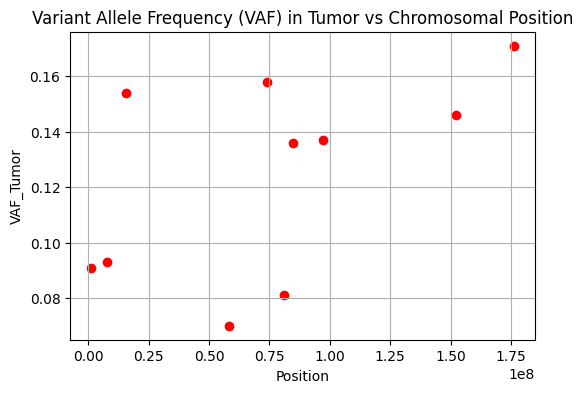

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of VAF_Tumor vs Position
plt.figure(figsize=(6, 4))
plt.scatter(df['Position'], df['VAF_Tumor'], color='red')
plt.title('Variant Allele Frequency (VAF) in Tumor vs Chromosomal Position')
plt.xlabel('Position')
plt.ylabel('VAF_Tumor')
plt.grid(True)
plt.show()


In [ ]:
# Filtering variants with VAF_Tumor > 0.1 (for example)
high_vaf_variants = df[df['VAF_Tumor'] > 0.1]
print(high_vaf_variants)


   Chromosome   Position  AF_Tumor  DP_Tumor  VAF_Tumor
0          10   97140787     0.137        42      0.137
1          15   73925444     0.158        33      0.158
2          16   84848199     0.136        39      0.136
7          19   15614428     0.154        34      0.154
8           3  176242700     0.171        32      0.171
9           4  152326206     0.146        33      0.146


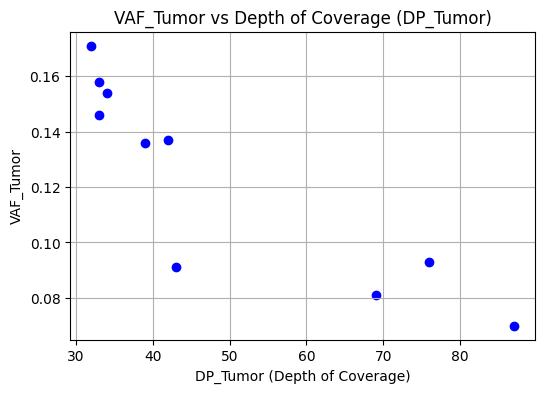

In [ ]:
# Scatter plot of VAF_Tumor vs DP_Tumor
plt.figure(figsize=(6, 4))
plt.scatter(df['DP_Tumor'], df['VAF_Tumor'], color='blue')
plt.title('VAF_Tumor vs Depth of Coverage (DP_Tumor)')
plt.xlabel('DP_Tumor (Depth of Coverage)')
plt.ylabel('VAF_Tumor')
plt.grid(True)
plt.show()
